Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     11889
           1       0.97      0.93      0.95      3792
           2       0.99      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



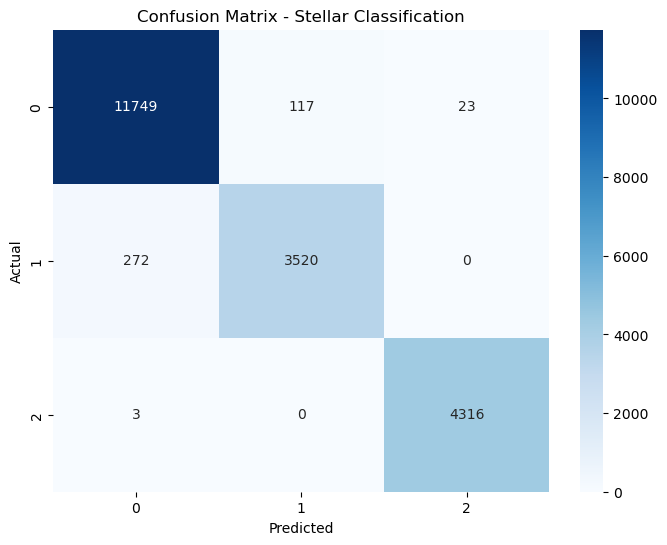

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load Stellar Classification Dataset
df_stellar = pd.read_csv("StarClassificationDataset.csv", low_memory=False)

# Identify the target column
target_column = "class"

# Convert categorical target to numeric
le = LabelEncoder()
df_stellar[target_column] = le.fit_transform(df_stellar[target_column])

# Drop irrelevant columns (keep only numerical features)
drop_columns = ["object_ID", "spec_obj_ID", "plate_ID", "fiber_ID", "MJD", "rerun_ID"]
df_stellar.drop(columns=drop_columns, inplace=True)

# Handle missing or non-numeric values
X_stellar = df_stellar.drop(columns=[target_column])
X_stellar = X_stellar.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
X_stellar.fillna(X_stellar.median(), inplace=True)  # Fill missing values

# Target variable
y_stellar = df_stellar[target_column]

# Stratified Split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X_stellar, y_stellar):
    X_train_stellar, X_test_stellar = X_stellar.iloc[train_index], X_stellar.iloc[test_index]
    y_train_stellar, y_test_stellar = y_stellar.iloc[train_index], y_stellar.iloc[test_index]

# Train a Classification Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_stellar, y_train_stellar)
y_pred_stellar = clf.predict(X_test_stellar)

# Classification Report & Findings
print("Classification Report:\n", classification_report(y_test_stellar, y_pred_stellar))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_stellar, y_pred_stellar), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stellar Classification")
plt.show()

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import math

# Load the dataset (California Housing Prices)
df_housing = pd.read_csv("housing.csv")

# Check for missing values
df_housing.isnull().sum()

# Handle categorical columns (e.g., 'ocean_proximity') using One-Hot Encoding
df_housing = pd.get_dummies(df_housing, drop_first=True)

# We need to create bins for the target variable (price) using Sturge's Rule
n = len(df_housing)
k = int(1 + math.log2(n))  # Sturge’s rule
df_housing['price_bin'] = pd.cut(df_housing['median_house_value'], bins=k)

# Stratified Split
X_housing = df_housing.drop(columns=['median_house_value', 'price_bin'])
y_housing = df_housing['median_house_value']
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_housing, y_housing, test_size=0.2, stratify=df_housing['price_bin'], random_state=42)

# Impute missing values (use the median strategy)
imputer = SimpleImputer(strategy='median')
X_train_housing = imputer.fit_transform(X_train_housing)
X_test_housing = imputer.transform(X_test_housing)

# Train a Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train_housing, y_train_housing)
y_pred_ridge = ridge_model.predict(X_test_housing)

# Train a Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train_housing, y_train_housing)
y_pred_lasso = lasso_model.predict(X_test_housing)

# Evaluate the models using MAE, MSE, and RMSE
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Ridge model evaluation
ridge_mae, ridge_mse, ridge_rmse = evaluate_model(y_test_housing, y_pred_ridge)

# Lasso model evaluation
lasso_mae, lasso_mse, lasso_rmse = evaluate_model(y_test_housing, y_pred_lasso)

In [16]:
metrics = {
    "Metric": ["MAE", "MSE", "RMSE"],
    "Ridge": [ridge_mae, ridge_mse, ridge_rmse],
    "Lasso": [lasso_mae, lasso_mse, lasso_rmse],
}

df_metrics = pd.DataFrame(metrics)

# Add a column to compare which model is better
def better_model(row):
    if row["Ridge"] < row["Lasso"]:
        return "Ridge"
    elif row["Ridge"] > row["Lasso"]:
        return "Lasso"
    else:
        return "Equal"

df_metrics["Better Model"] = df_metrics.apply(better_model, axis=1)

# Display the metrics in a table with improved spacing
print("\nEvaluation Metrics Comparison:")
print(f"{'Metric':<10} {'Ridge':<12} {'Lasso':<12} {'Better Model'}")
print("="*50)

# Print each row with proper alignment
for index, row in df_metrics.iterrows():
    print(f"{row['Metric']:<10} {row['Ridge']:<12.2f} {row['Lasso']:<12.2f} {row['Better Model']}")


Evaluation Metrics Comparison:
Metric     Ridge        Lasso        Better Model
MAE        49614.08     49611.16     Lasso
MSE        4707492083.67 4707438560.85 Lasso
RMSE       68611.17     68610.78     Lasso
